# POTHOLE DETECTION

#### We want our vehicle to avoid obstacles and potholes on the road.Write a code to detect the simulated potholes in the videos in the following drive link

##### Your objective is to detect the potholes by drawing bounding boxes over them in the input video itself

## Main Idea: USED BLOBS DETECTION in OPEN-CV 
As the pothole is not a circle so blob detection can actually detect the blobs easily after that I m plotting circle around the pothole (i.e only possible beacuse it return a keypoints that are alphanumeric so we dont coordinates). Next we are using a Black and White image and we are doing detection of circle as we have drawn them using Hough circle Transform and we get coord of center and then we plot a rectangle around it

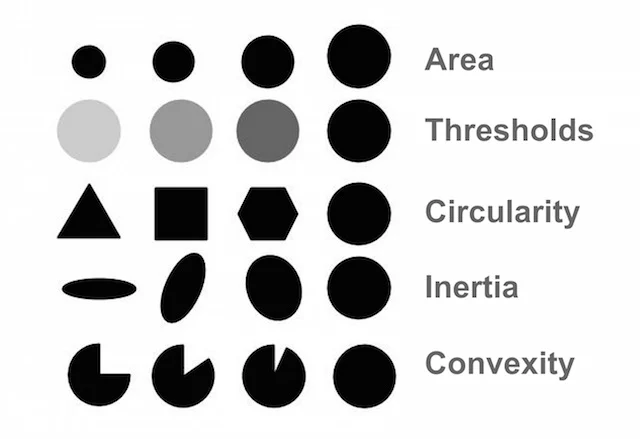

In [14]:
import cv2
import numpy as np  
import cv2.cv2 as cv

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('abhiyaan/bolt_test_pothole.mp4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")

# Read until video is completed
while(cap.isOpened()):
      
      # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
    
        # Display the resulting frame
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        img=  frame
        
        # We are framing the image with mask. Here pathhlanes and blobs are black
        lower_white = np.array([0,0,168])# define range of black color in HSV
        upper_white = np.array([172,111,255])
        mask = cv2.inRange(hsv, lower_white, upper_white)
        res = cv2.bitwise_and(img,img, mask= mask)# Bitwise-AND mask and original image
        res2 = cv2.bitwise_not(mask)
        
    
        params = cv2.SimpleBlobDetector_Params()

        # Set Area filtering parameters
        params.filterByArea = True
        params.minArea = 1400


        # Set Circularity filtering parameters
        params.filterByCircularity = True
        params.minCircularity = 0.4

        # Set Convexity filtering parameters
        params.filterByConvexity = True
        params.minConvexity = 0.2
    
        # Set inertia filtering parameters
        params.filterByInertia = True
        params.minInertiaRatio = 0.01


        # Create a detector with the parameters
        detector = cv2.SimpleBlobDetector_create(params)

        # Detect blobs
        keypoints = detector.detect(res2)
        #print(keypoints)

        # Draw blobs on our image as red circles
        blank = np.zeros((1, 1))
        blobs = cv2.drawKeypoints(res2, keypoints, blank, (0, 255, 0),
                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        
        cv2.imshow('Frame', blobs)
        if len(keypoints)!=0:
            blobs=cv2.cvtColor(blobs,cv2.COLOR_BGR2GRAY)
            all_circs=cv2.HoughCircles(blobs,cv.HOUGH_GRADIENT,0.9,120,param1=50,param2=30,minRadius=5,maxRadius=80)
            x_center=all_circs[0][0][0]
            y_center=all_circs[0][0][1]
            w=75
            l=25
            start_point=(int(x_center)-w,int(y_center)+l)
            end_point=(int(x_center)+w,int(y_center)-l)
            color=(0,0,0)
            thickness=4
            img = cv2.rectangle(frame, start_point, end_point,color=(0,255,0), thickness=4)
        else:
            img=frame

        cv2.imshow('Frame', img)
   
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
   
        # Break the loop
      else: 
        break
# When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()

## OUTPUT

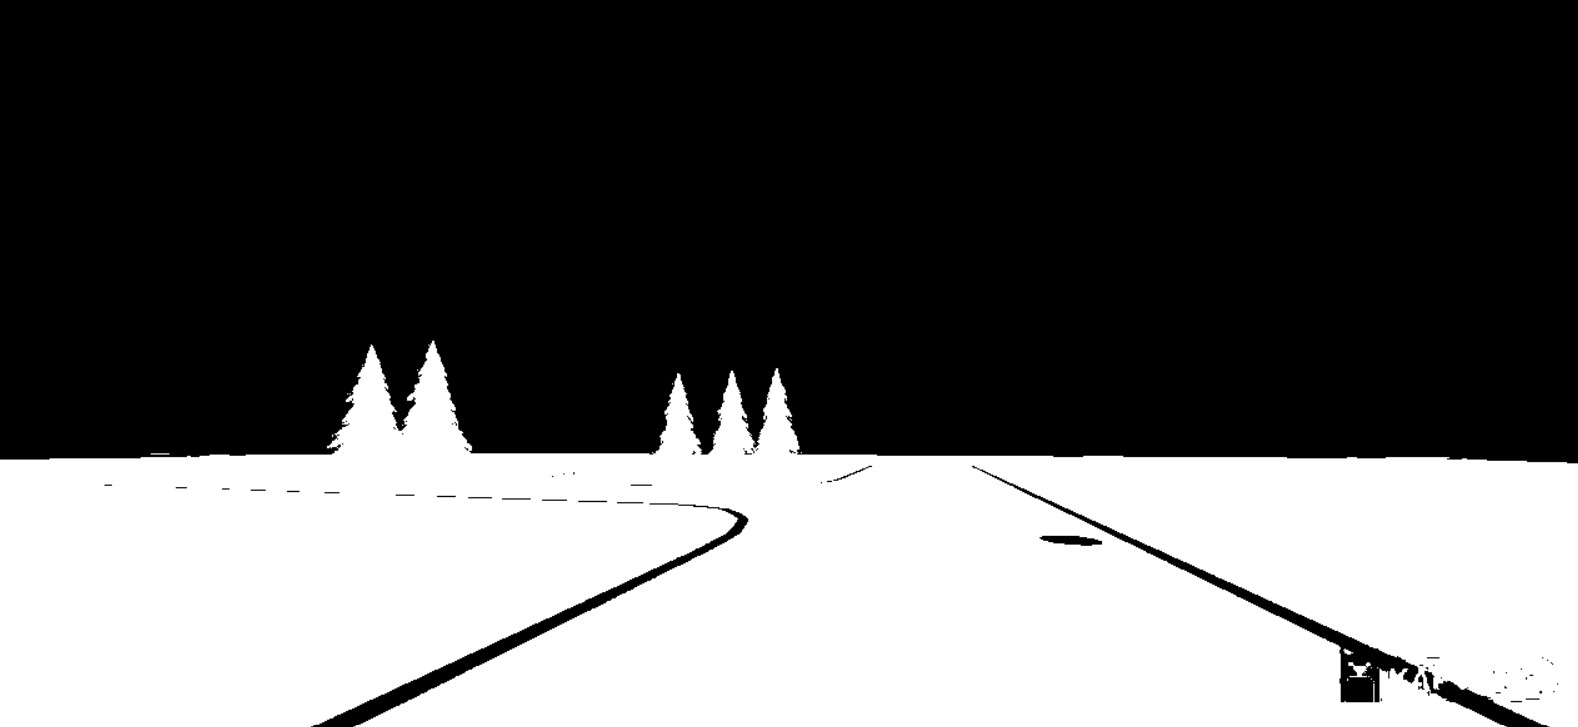

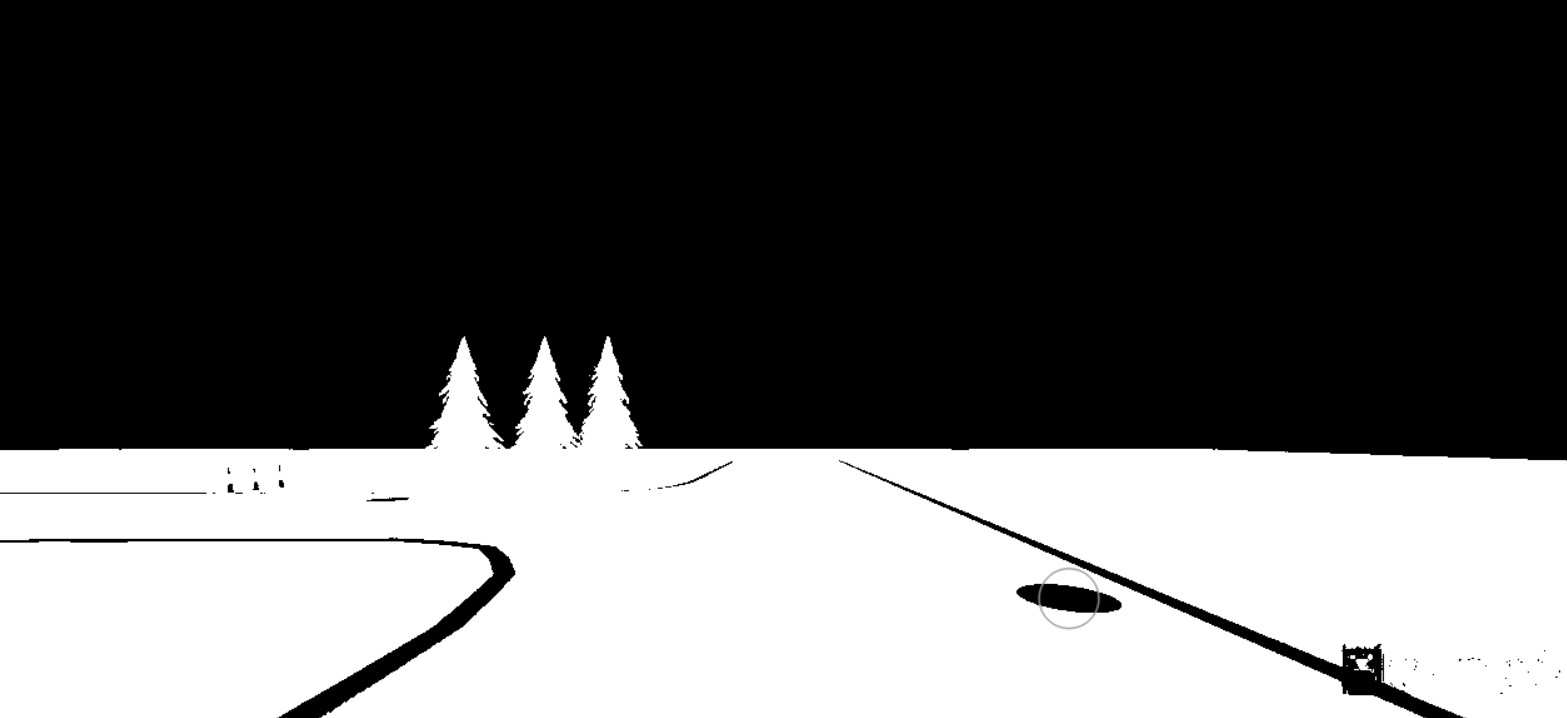

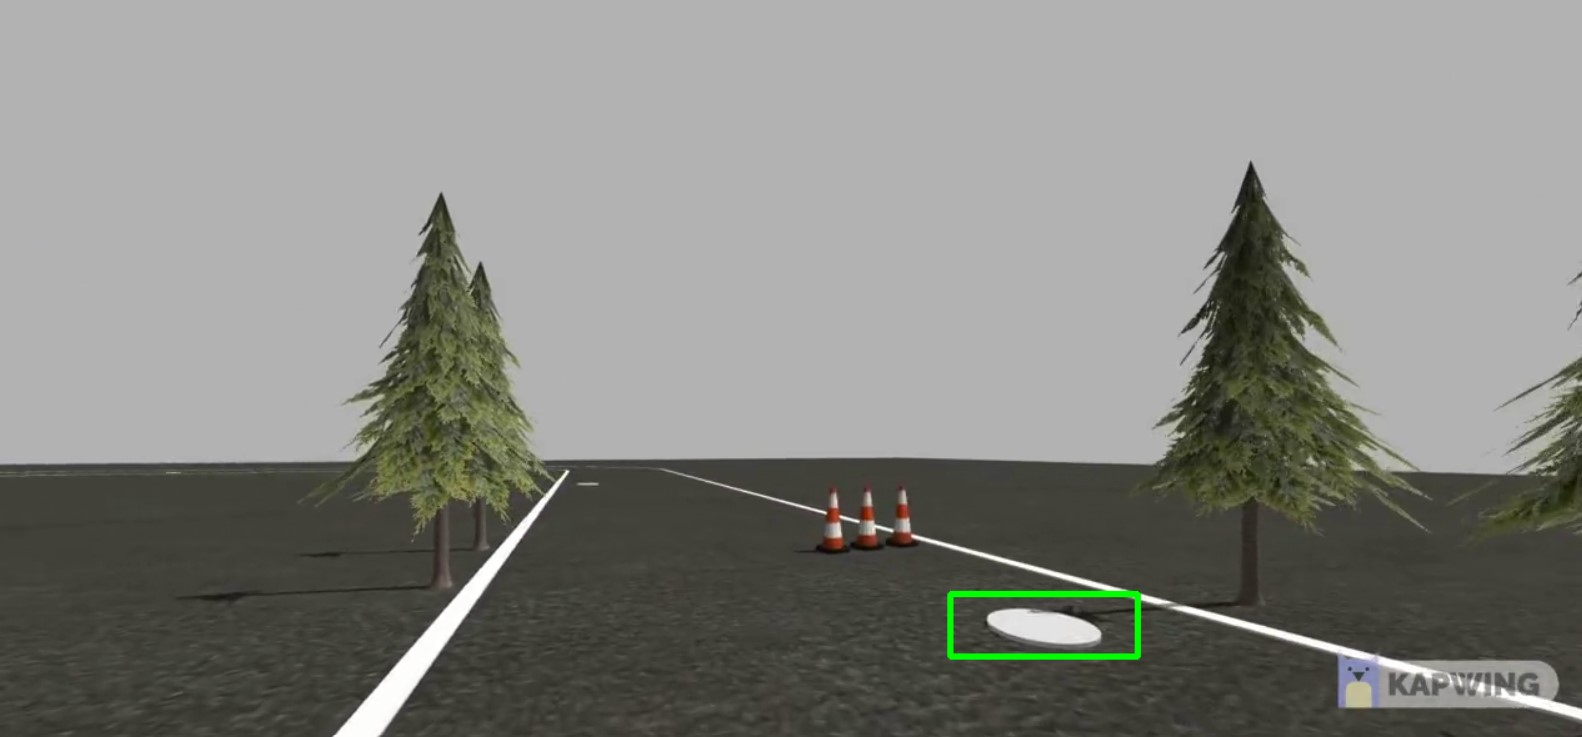

![]('11.jpg')